In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [64]:
sns.set()
sns.set_palette('viridis')

plt.rcParams['figure.figsize'] = (15,4)
plt.rcParams['figure.dpi'] = 200

In [3]:
df = pd.read_csv('./vgsales.csv', index_col='Rank')

In [4]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.shape

(16598, 10)

Default Datatypes

In [6]:
df.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
df['Year'] = df['Year'].convert_dtypes() # Coverting the 'Year' column from float to 'int'

In [8]:
df.head(2)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


Updated Datatypes

In [9]:
df.dtypes

Name             object
Platform         object
Year              Int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  Int64  
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), object(4)
memory usage: 1.4+ MB


In [11]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [65]:
df.nunique()

Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [12]:
# Year with the most number of releases

In [13]:
print(f"# of Years in the dataset: {df['Year'].nunique()}")
print(f"Max year in the dataset: {df['Year'].max()}")
print(f"Min year in the dataset: {df['Year'].min()}")

# of Years in the dataset: 39
Max year in the dataset: 2020
Min year in the dataset: 1980


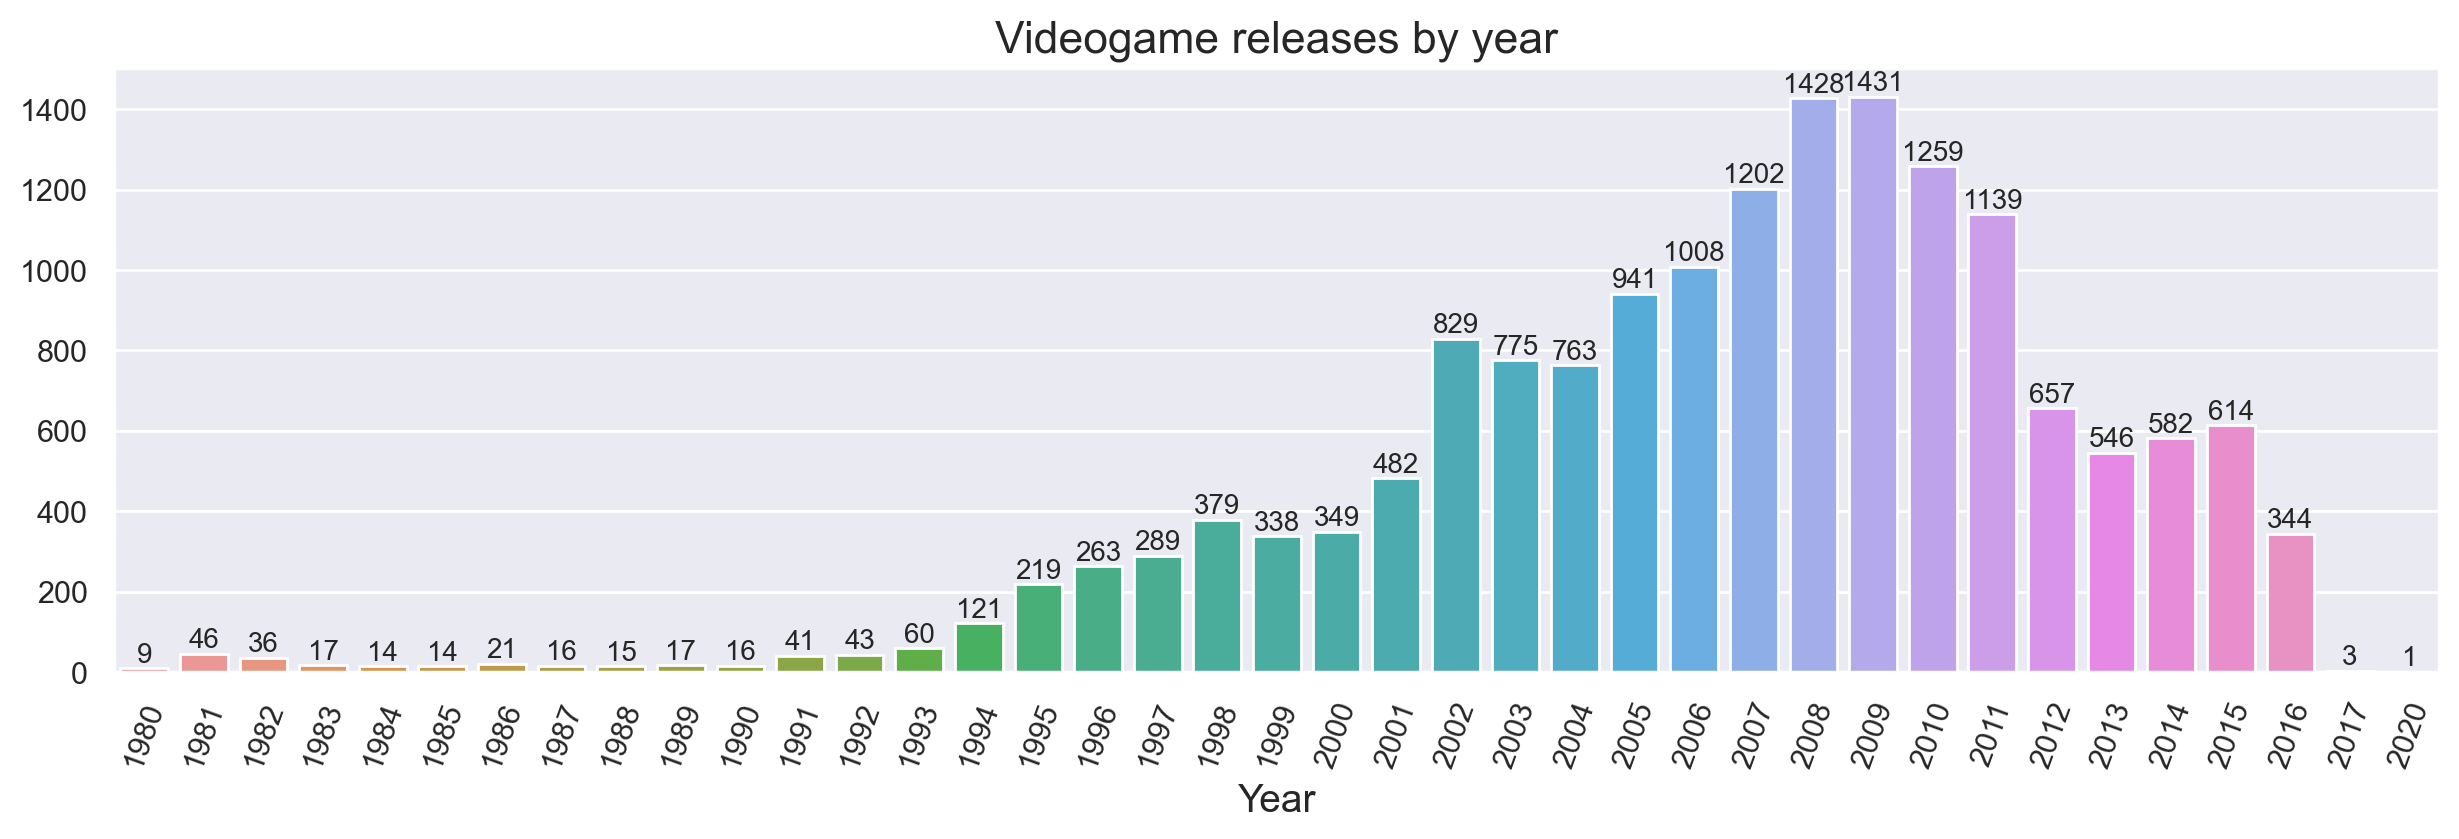

In [42]:
year_not_null = df.loc[df['Year'].notnull()]

sns.countplot(data=year_not_null, x='Year')

year_count = year_not_null['Year'].nunique()
year_values = year_not_null.groupby('Year').size().values

for index in range(year_count):
    plt.text(index,year_values[index], str(year_values[index]), ha='center', va='bottom', fontsize='small')

plt.xticks(rotation=70)
plt.title('Videogame releases by year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('');

<center>The year 2009 had the highest number of videogame releases - 1431, closely followed by 2008 which had 1428.</center>

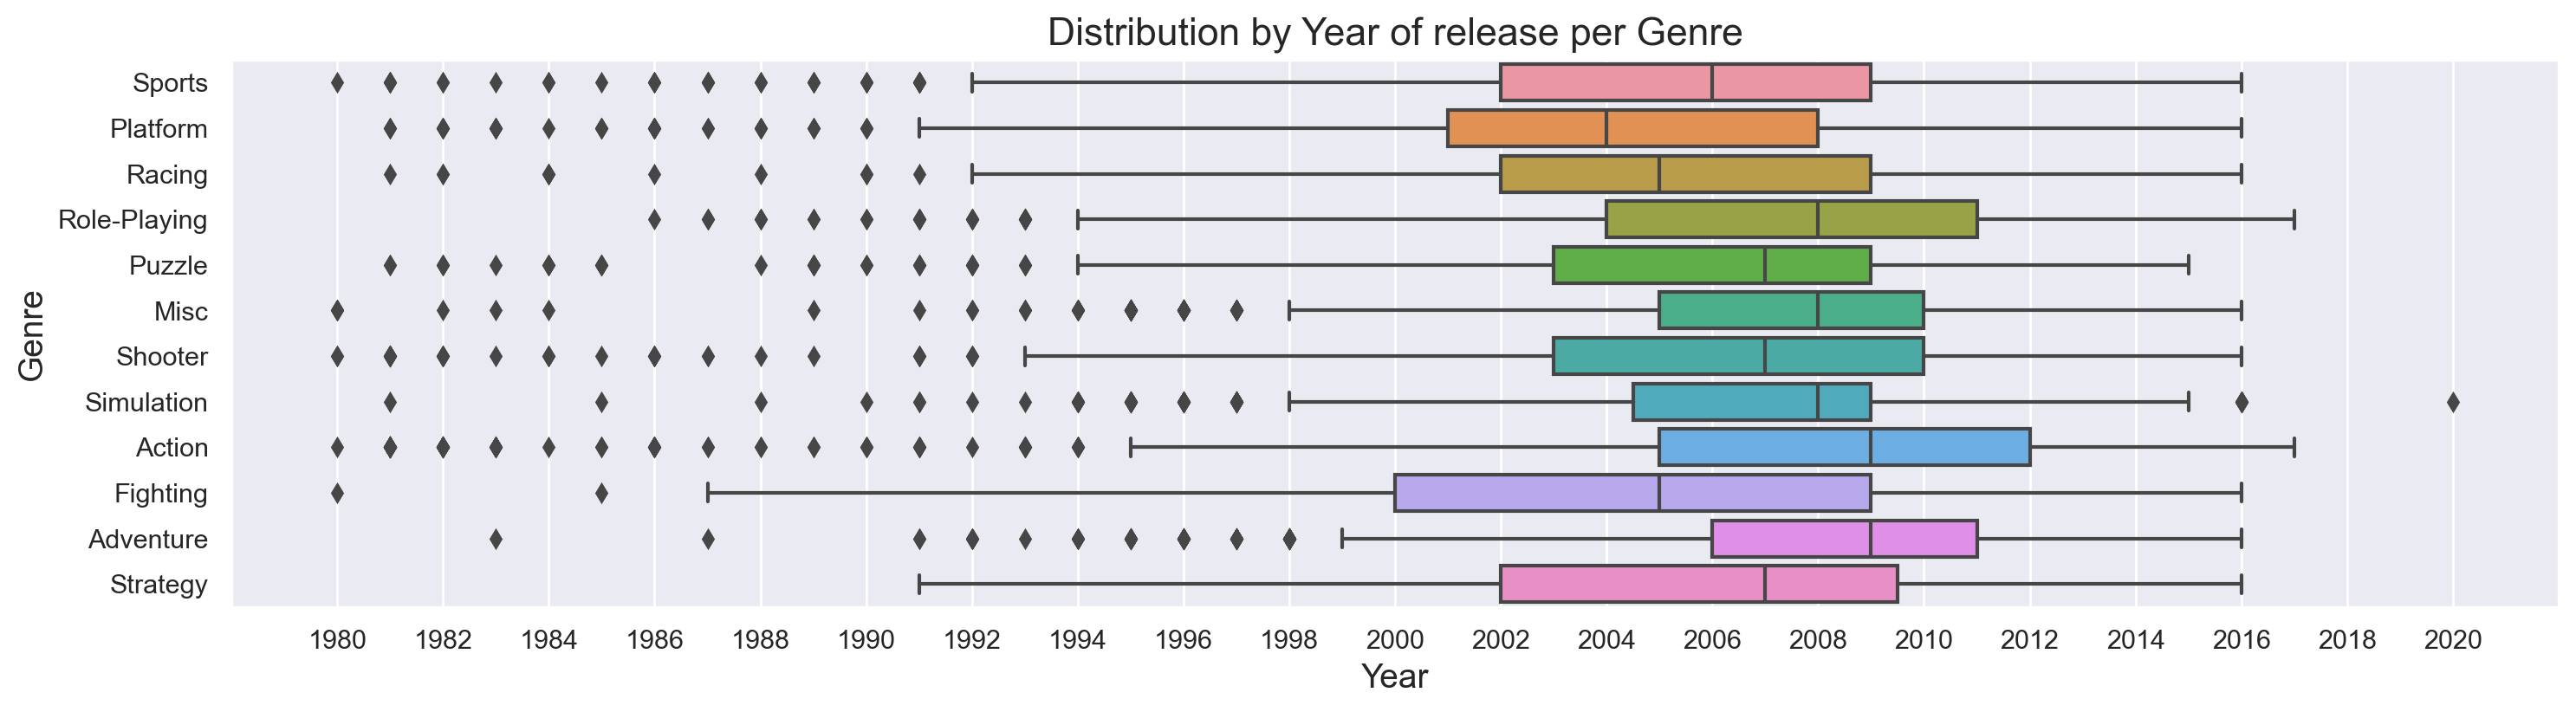

In [62]:
sns.boxplot(data=df, x='Year', y='Genre')
plt.xticks(np.arange(1980,2021,2))
plt.tight_layout()
plt.title('Distribution by Year of release per Genre', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Genre', fontsize=14);

<center> The above plot indicates when most of the Games in the dataset released for each genre.</center>

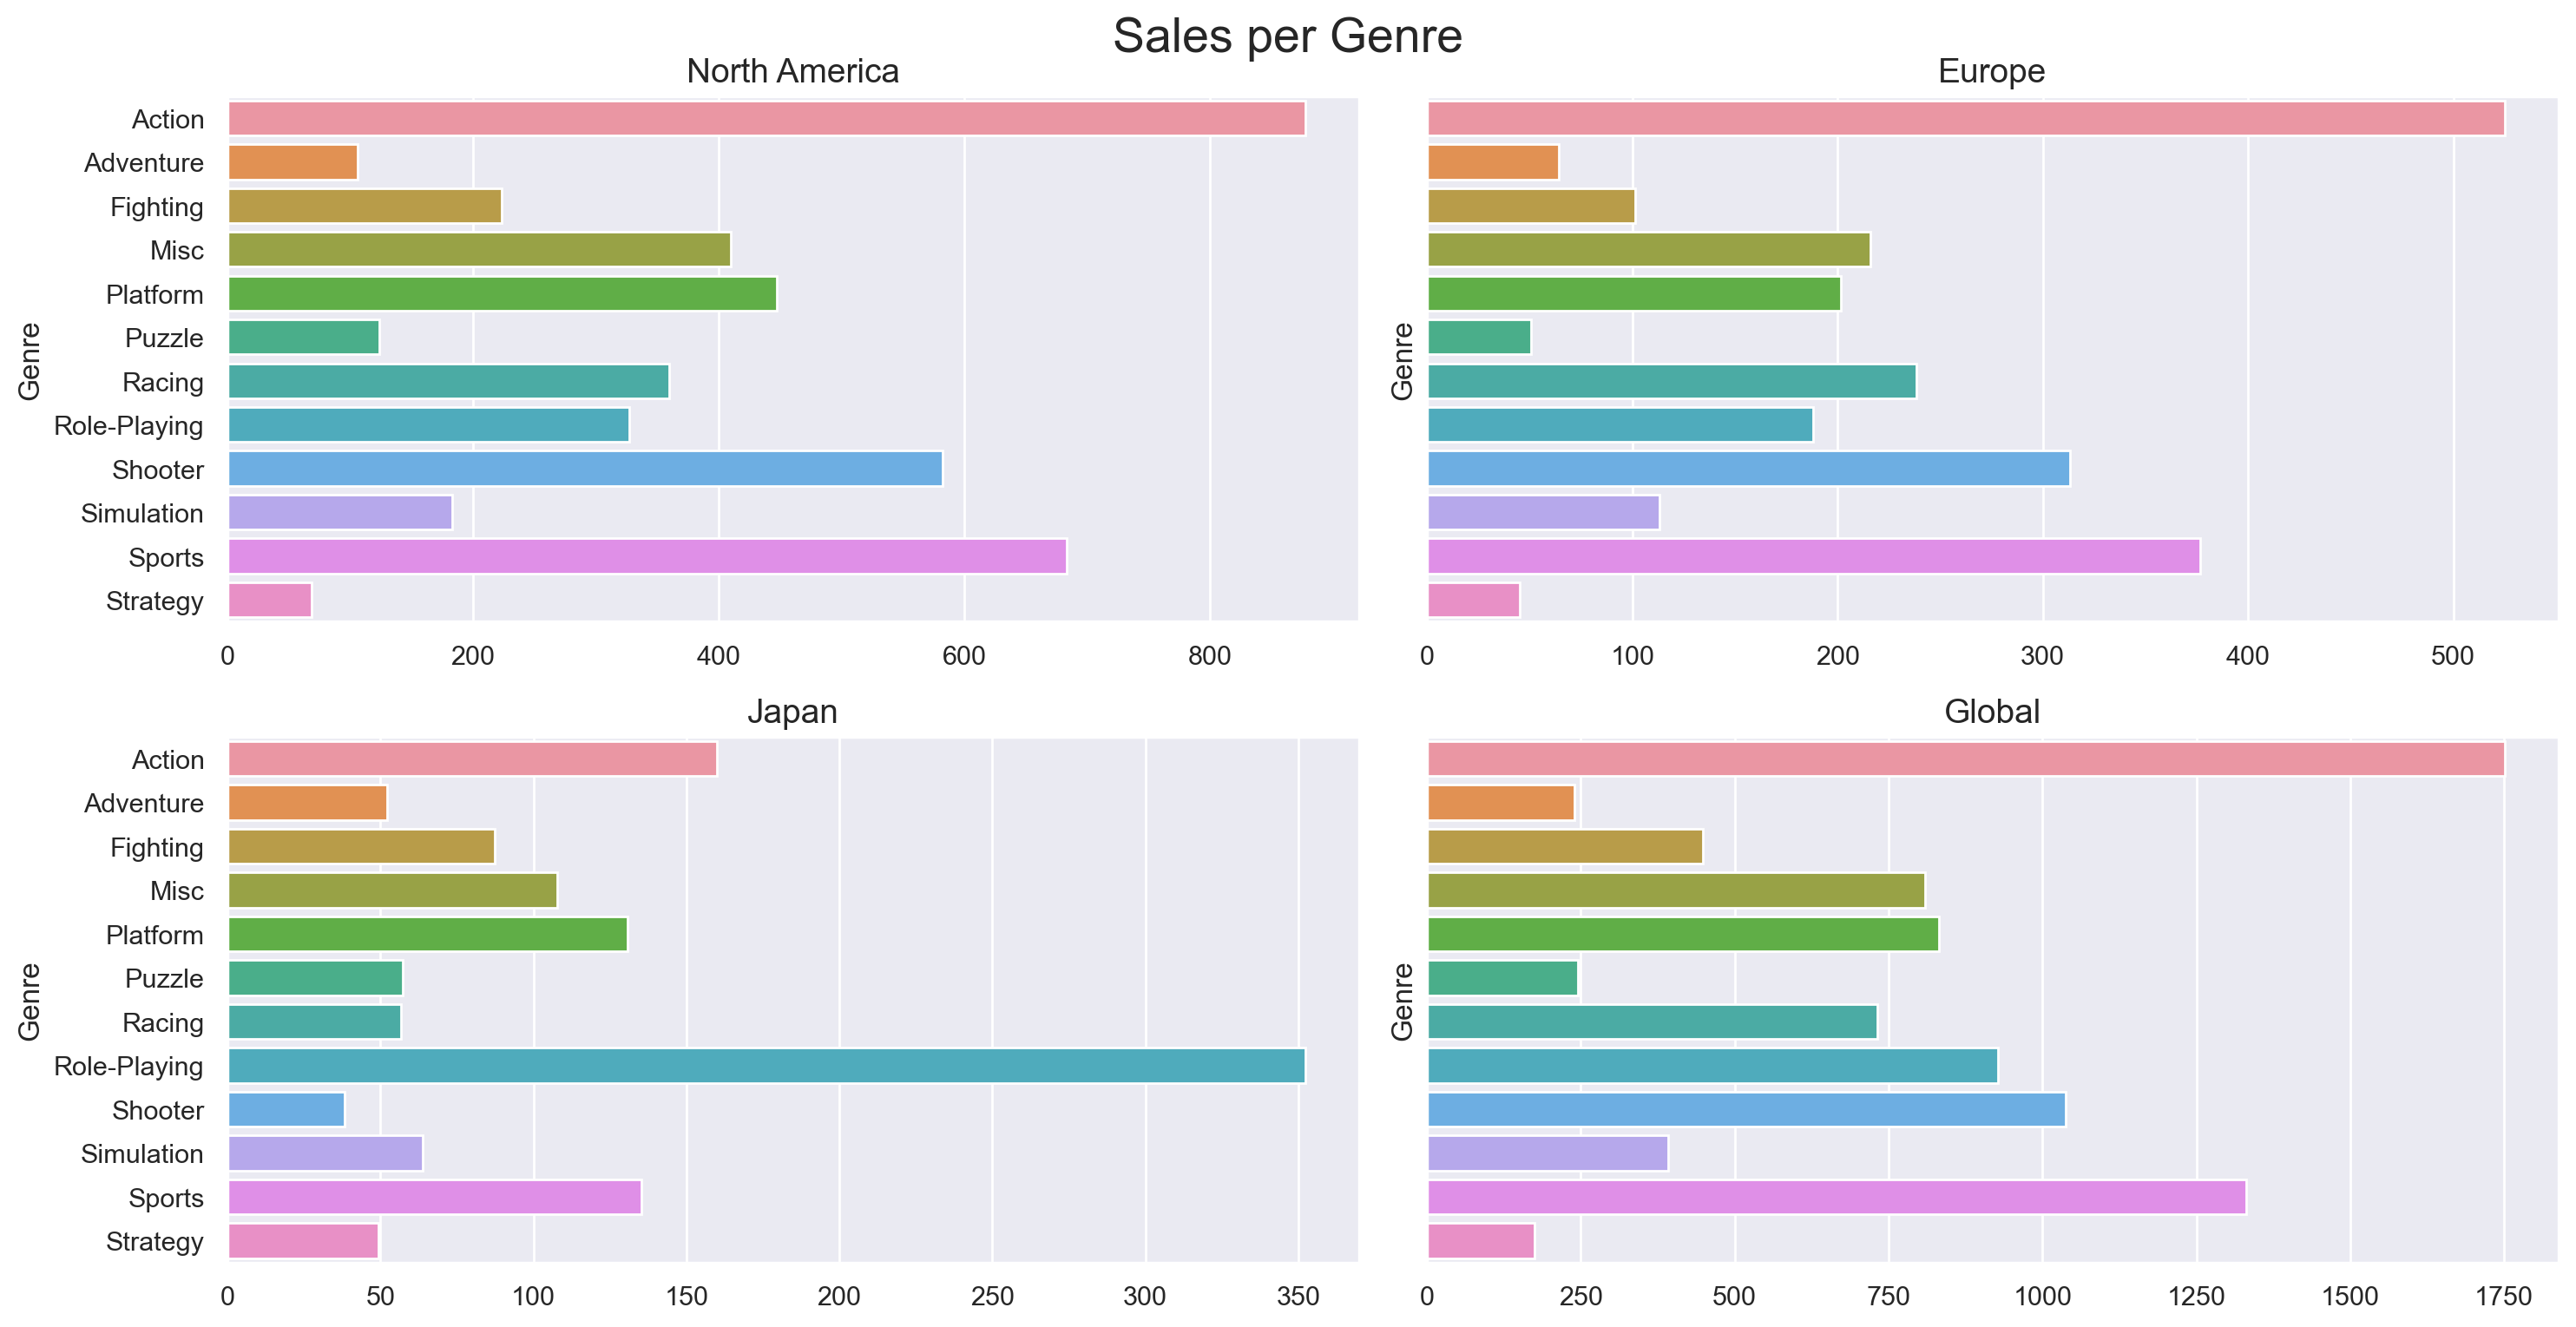

In [63]:
genreGroup = df.groupby('Genre')

na_sales_by_genre = genreGroup['NA_Sales'].sum().reset_index()
eu_sales_by_genre = genreGroup['EU_Sales'].sum().reset_index()
jp_sales_by_genre = genreGroup['JP_Sales'].sum().reset_index()
global_sales_by_genre = genreGroup['Global_Sales'].sum().reset_index()

fig, axes = plt.subplots(2,2, figsize=(15,8), dpi=200, sharey=True)
fig.suptitle('Sales per Genre', fontsize=20)

sns.barplot(ax=axes[0][0], data=na_sales_by_genre, y='Genre', x='NA_Sales')
sns.barplot(ax=axes[0][1], data=eu_sales_by_genre, y='Genre', x='EU_Sales')
sns.barplot(ax=axes[1][0], data=jp_sales_by_genre, y='Genre', x='JP_Sales')
sns.barplot(ax=axes[1][1], data=global_sales_by_genre, y='Genre', x='Global_Sales')
plt.tight_layout()


fontsize = 14
labels = [['North America', 'Europe'], ['Japan', 'Global']]

for x in range(2):
    for y in range(2):
        axes[x][y].set_title(labels[x][y], fontsize=fontsize)
        axes[x][y].set_xlabel('')



From the above graphs it's clear that <i>'Action'</i> is the largest selling category in North America, Europe and globally followed by <i>'Sports'</i>. However when it comes to Japan, <i>'Role-Playing'</i> games leads the charts with more than double the sales in comparison to <i>'Action'</i> which comes second.

In [68]:
# Best Performing Console interms of sales

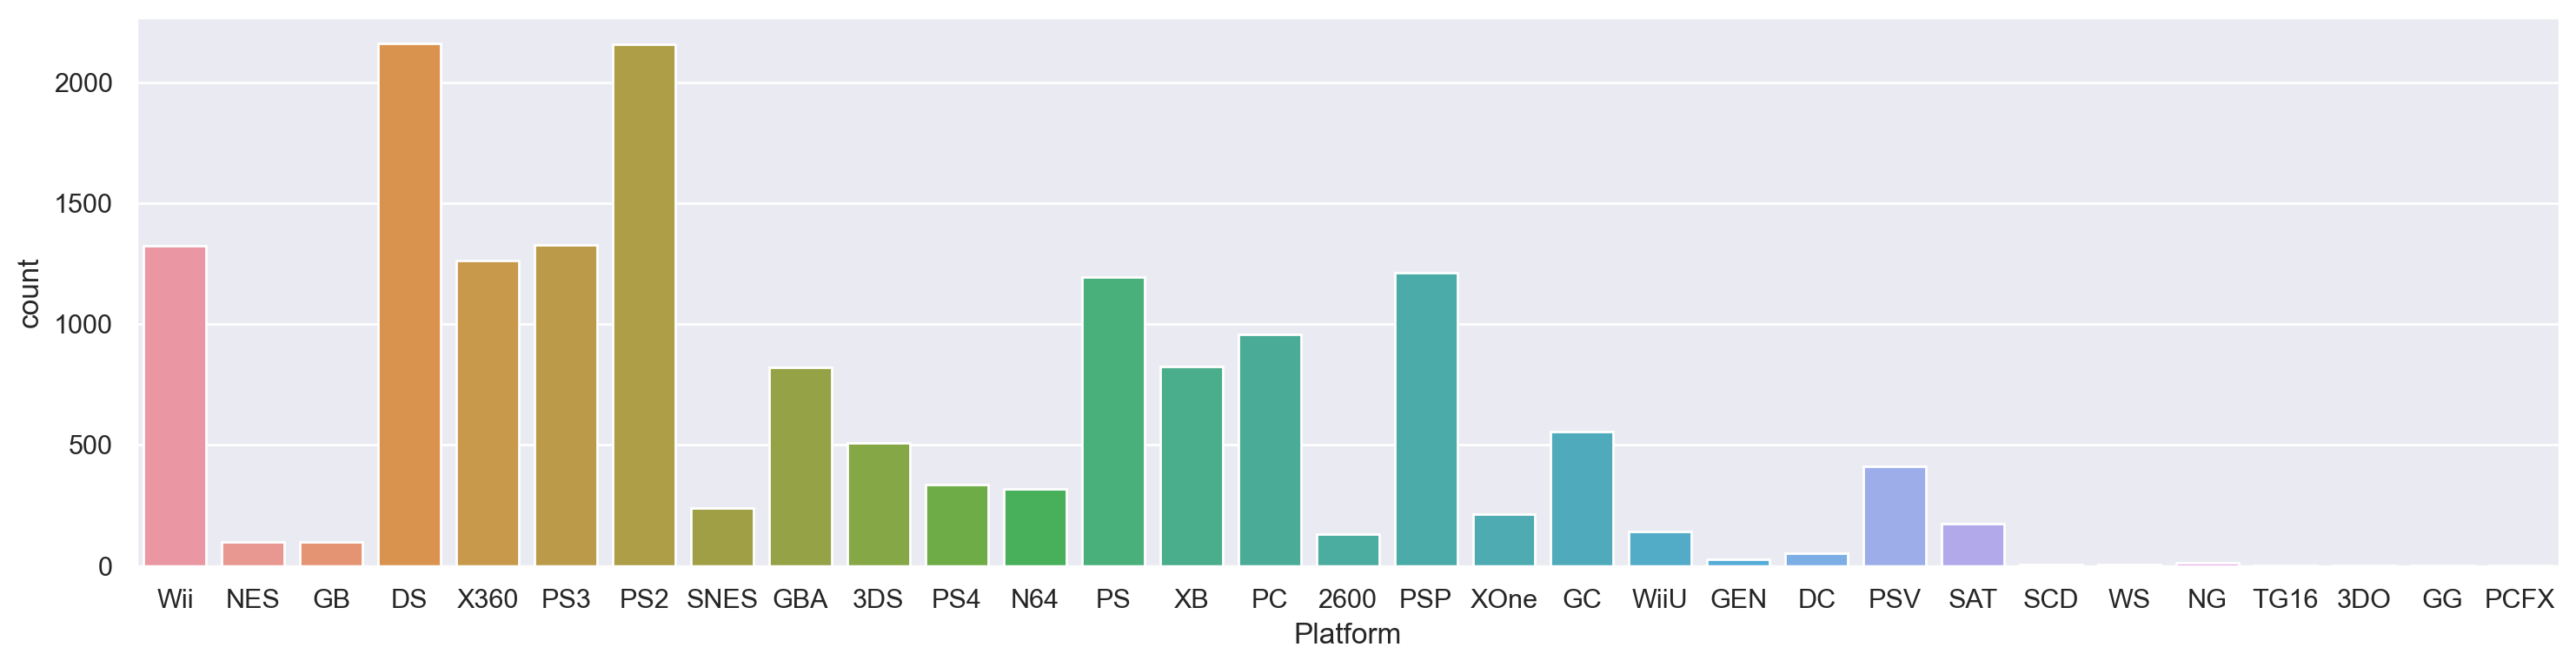

In [75]:
sns.countplot(data=df, x='Platform')
plt.tight_layout();

<center> Based on the current dataset, we can clearly see <i>Nintendo's DS</i> and <i>Sony's Playstation 2</i> had the largest number of game releases </center>

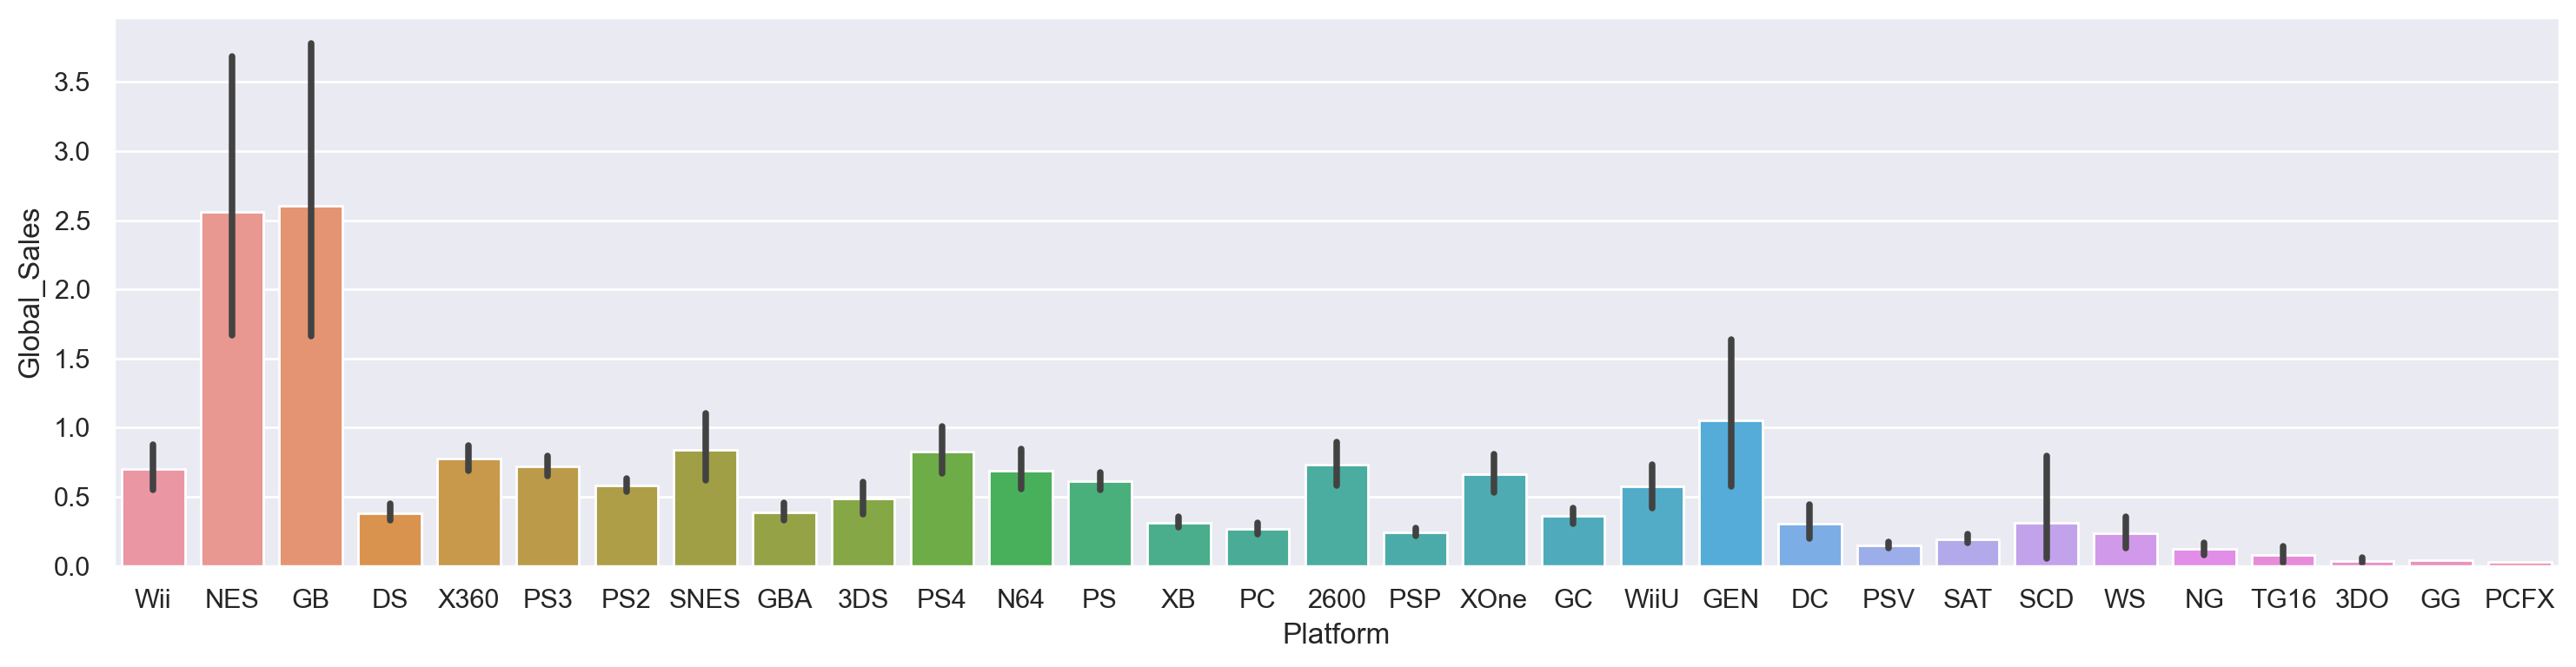

In [76]:
sns.barplot(data=df, x='Platform', y='Global_Sales')
plt.tight_layout();

<center>This plot shows a completely different perspective, even though <i>NES</i> and <i>Gameboy</i> had very few number of games, their games totally outsold all of the competitors</center>

In [77]:
top100 = df.loc[:100]
top100

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
97,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
98,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45


<AxesSubplot:xlabel='Platform', ylabel='count'>

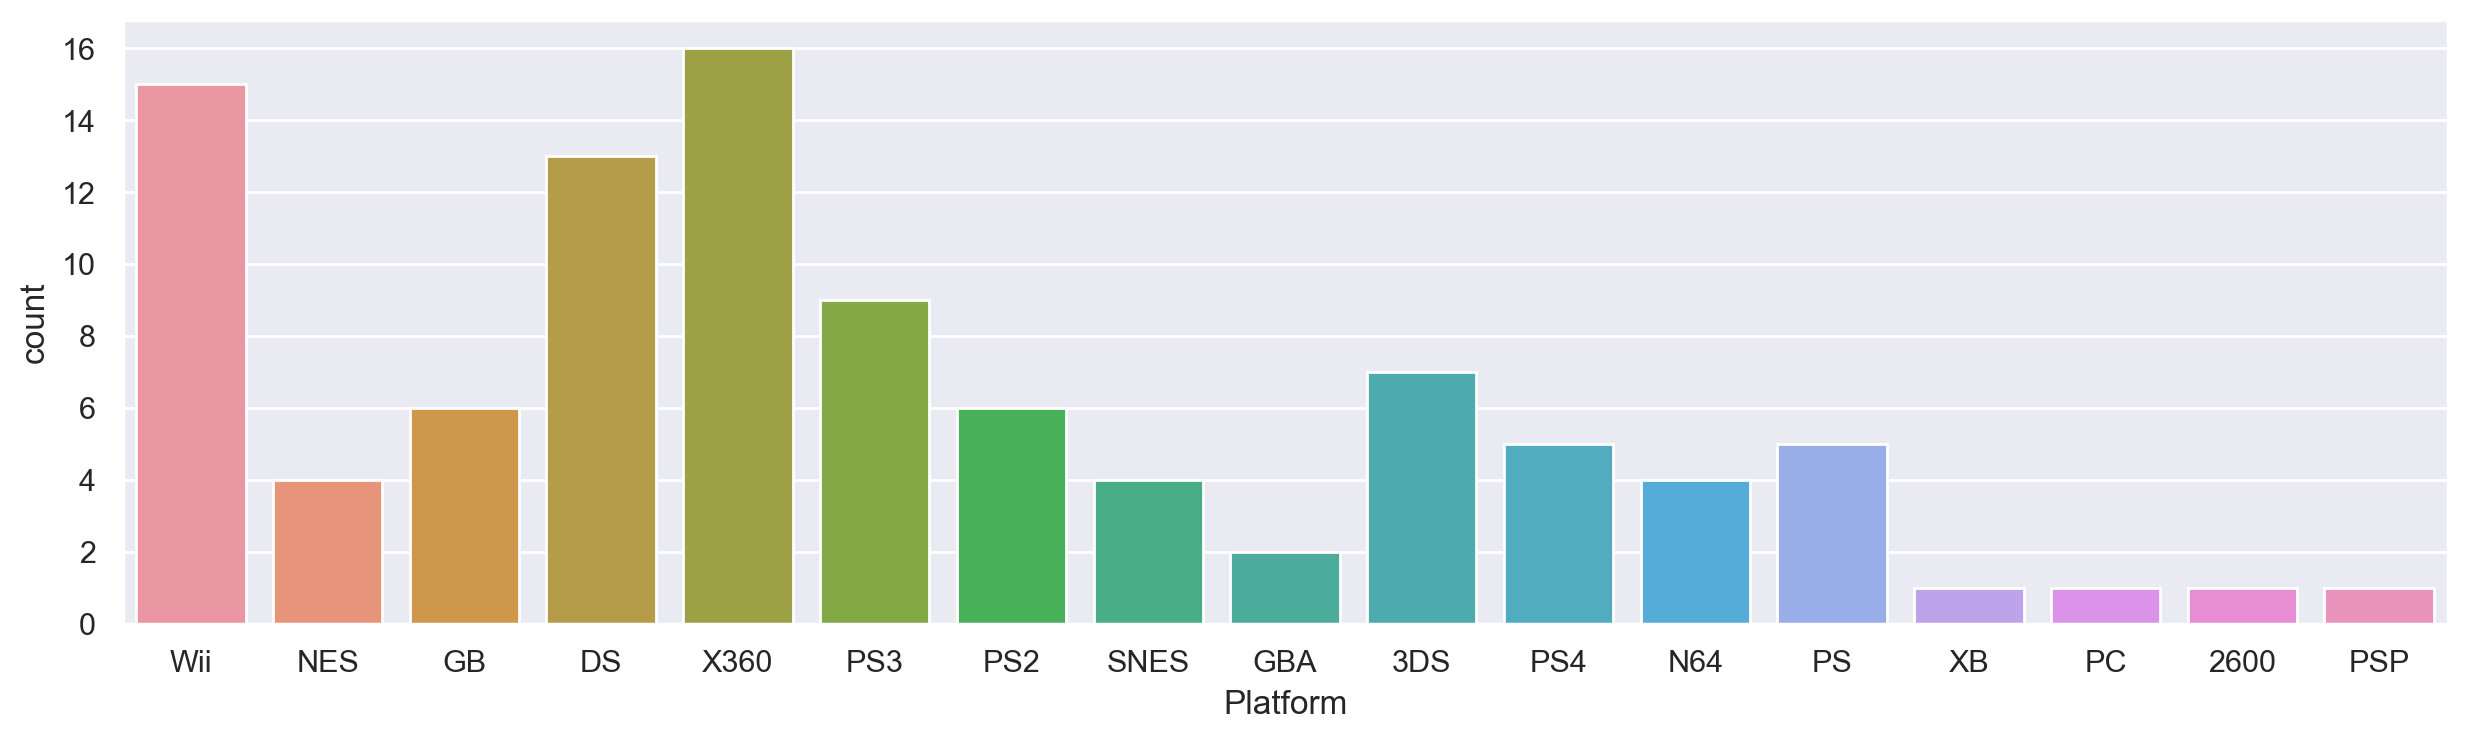

In [78]:
sns.countplot(data=top100, x='Platform')